In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [30]:
#Load the dataset and clean the data
kidney_df = pd.read_csv("kidney_disease.csv")
kidney_df["classification"] = kidney_df["classification"].str.strip()

#Creates feature matrix X which is every column except "classification" than fills all the missing values of each feature column with their respective medians
#Create a vector which is the "classification" column

X = kidney_df.drop("classification", axis=1)
y = kidney_df["classification"]
X = X.select_dtypes(include="number")
X = X.fillna(X.median())

#Splits the model 70% of it is training data, and the remaining 30% is the testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=25)

In [31]:
#Test K = 1,3,5,7,9
k_values = [1,3,5,7,9]
accuracies = []

In [32]:
#Test each K, then compute its respective accuracy
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_prediction = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_prediction)
    accuracies.append(accuracy)
    print(f"k={k}: Accuracy={accuracy:.4f}")

k=1: Accuracy=0.9917
k=3: Accuracy=0.9917
k=5: Accuracy=0.9833
k=7: Accuracy=0.9833
k=9: Accuracy=0.9750


In [36]:
#Results table fr=or each K value
results = pd.DataFrame({'k': k_values, "Accuracy": accuracies})
print("\nResults Table:")
results


Results Table:


,k,Accuracy
0,1,0.991667
1,3,0.991667
2,5,0.983333
3,7,0.983333
4,9,0.975000


In [37]:
#Displays the most accurate K value
best_k = k_values[accuracies.index(max(accuracies))]
print(f"\nBest k: {best_k} with accuracy {max(accuracies):.4f}")


Best k: 1 with accuracy 0.9917


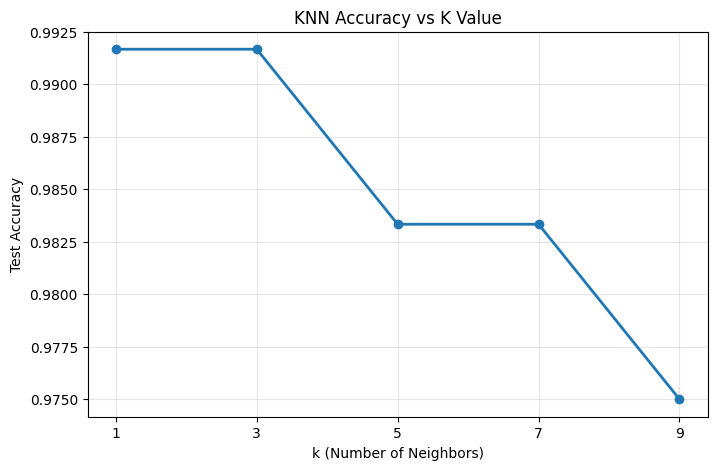

In [35]:
'''
Looking at the table we can see the higher the K-Value than the less accurate the model becomes. However, the smaller the K-value the more sensitive it is to individual points and has more complex boundaries, but a larger k value makes it harder for the model to detect patterns

A small K value can lead to overfitting since it becomes very sensitive and when memorizing the training data is includes the outliers and noise
A large K value can lead to underfitting since with so many neighbors the predictions become to generic, since it can have a neighbors spread between positive and negative in this case
'''